# Analisa Data Kunjungan Wisatawan DKI Jakarta 2020

Pada folder bidang pariwisata DKI Jakarta awalanya terdapat 40 dataset, namun pada kasus ini hanya digunakan 25 dataset sebagai berikut.
- Data jumlah kunjungan wisatawan mancanegara ke destinasi wisata di provinsi DKI Jakarta dari bulan Januari hingga bulan Desember tahun 2020 (12 file, tiap bulan 1 file)
- Data jumlah kunjungan wisatawan nusantara dari bulan januari hingga bulan desember tahun 2020 (12 file, tiap bulan 1 file)
- Data kunjungan wisatawan mancanegara ke provinsi DKI Jakarta bulan januari tahun 2020 melalui 2 pintu masuk (1 file)

Data yang lainnya tidak digunakan karena tidak/kurang berhubungan dengan kasus yang diangkat, selain itu ada pula dataset yang memiliki keterangan yang salah ataupun kurang jelas sehingga idak bisa dan tidak perlu dikaitkan dengan kasus yang ada.


In [908]:
# Mengimport library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

In [909]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 1. Memanggil semua dataset yang digunakan dan menggabungkan dataset yang dapat digabungkan

In [910]:
# Fungsi memanggil dataset
def load_dataset(filename):
    dataset = pd.read_csv(filename)
    return dataset

In [911]:
# Memanggil dan melihat setiap dataset

# Data yang hanya terdiri dari 1 file
# Data kunjungan wisatawan mancanegara ke provinsi DKI Jakarta bulan januari tahun 2020 melalui 2 pintu masuk
kunjungan_mancanegara_ke_DKI_januari_2020 = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-kunjungan-wisatawan-mancanegara-ke-provinsi-dki-jakarta-bulan-januari-tahun-2020-melalui-2-pintu-masuk.csv')

# Data yang terdiri dari >1 file
# Data jumlah kunjungan wisatawan mancanegara ke destinasi wisata di provinsi DKI Jakarta dari bulan Januari hingga bulan Desember tahun 2020
kwm_januari = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-januari-tahun-2020.csv')
kwm_februari = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-februari-tahun-2020.csv')
kwm_maret = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-maret-tahun-2020.csv')
kwm_april = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-april-tahun-2020.csv')
kwm_mei = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-mei-tahun-2020.csv')
kwm_juni = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-juni-tahun-2020.csv')
kwm_juli = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-juli-tahun-2020.csv')
kwm_agustus = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-agustus-tahun-2020.csv')
kwm_september = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-september-tahun-2020.csv')
kwm_oktober = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-oktober-tahun-2020.csv')
kwm_november = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-november-tahun-2020.csv')
kwm_desember = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-mancanegara-ke-destinasi-wisata-di-provinsi-dki-jakarta-bulan-desember-tahun-2020.csv')

# Data jumlah kunjungan wisatawan nusantara dari bulan januari hingga bulan desember tahun 2020
kwn_januari = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-nusantara-bulan-januari-tahun-2020.csv')
kwn_februari = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-nusantara-bulan-februari-tahun-2020.csv')
kwn_maret = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-nusantara-bulan-maret-tahun-2020.csv')
kwn_april = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-nusantara-bulan-april-tahun-2020.csv')
kwn_mei = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-nusantara-bulan-mei-tahun-2020.csv')
kwn_juni = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-nusantara-bulan-juni-tahun-2020.csv')
kwn_juli = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-nusantara-bulan-juli-tahun-2020.csv')
kwn_agustus = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-nusantara-bulan-agustus-tahun-2020.csv')
kwn_september = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-nusantara-bulan-september-tahun-2020.csv')
kwn_oktober = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-nusantara-bulan-oktober-tahun-2020.csv')
kwn_november = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-nusantara-bulan-november-tahun-2020.csv')
kwn_desember = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-jumlah-kunjungan-wisatawan-nusantara-bulan-desember-tahun-2020.csv')

In [912]:
# Menggabungkan dataset kunjungan wisatawan mancanegara maupun nusantara ke destinasi wisata DKI Jakarta dari Januari-Desember 2020
data_kunjungan_wisatawan_mancanegara = pd.concat([kwm_januari, kwm_februari, kwm_maret, kwm_april, kwm_mei,
                                                  kwm_juni, kwm_juli, kwm_agustus, kwm_september, kwm_oktober,
                                                  kwm_november, kwm_desember], ignore_index=True)

data_kunjungan_wisatawan_nusantara = pd.concat([kwn_januari, kwn_februari, kwn_maret, kwn_april, kwn_mei,
                                                kwn_juni, kwn_juli, kwn_agustus, kwn_september, kwn_oktober,
                                                kwn_november, kwn_desember], ignore_index=True)

In [913]:
kunjungan_mancanegara_ke_DKI_januari_2020

,tahun,bulan,kedatangan_wisata_mancanegara,jumlah
0,2020,1,Bandara Soekarno-Hatta,173453
1,2020,1,Bandara Halim PK,161


In [914]:
data_kunjungan_wisatawan_mancanegara

,tahun,bulan,destinasi_wisata,jumlah
0,2020,1,Taman Impian Jaya Ancol,516
1,2020,1,Taman Mini Indonesia Indah,0
2,2020,1,Taman Margasatwa Ragunan,449
3,2020,1,Monumen Nasional,2070
4,2020,1,Museum Nasional,2877
5,2020,1,Museum Satria Mandala,0
6,2020,1,Museum Sejarah Jakarta,1831
7,2020,1,Museum Tekstil,312
8,2020,1,Museum Bahari,274
9,2020,1,Museum Seni Rupa dan Keramik,300


In [915]:
data_kunjungan_wisatawan_nusantara

,tahun,bulan,destinasi_wisata,jumlah
0,2020,1,Taman Impian Jaya Ancol,620327.000
1,2020,1,Taman Mini Indonesia Indah,272960.000
2,2020,1,Taman Margasatwa Ragunan,289748.000
3,2020,1,Monumen Nasional,24.325
4,2020,1,Museum Nasional,18145.000
5,2020,1,Museum Satria Mandala,2046.000
6,2020,1,Museum Sejarah Jakarta,66251.000
7,2020,1,Museum Tekstil,2658.000
8,2020,1,Museum Bahari,2087.000
9,2020,1,Museum Seni Rupa dan Keramik,12190.000


## 2. Merapikan dan membersihkan data yang digunakan, serta menambah data apabila diperlukan (Data cleaning)

### - Karena pada data kunjungan wisatawan mancanegara ke provinsi DKI Jakarta bulan januari tahun 2020 melalui 2 pintu masuk terlalu sedikit, maka kita akan memperluas cakupannya/menambah datanya menjadi 'data kunjungan wisatawan mancanegara ke provinsi DKI Jakarta tahun 2020'. 

#### Data yang ditambahkan merupakan data yang dicari sendiri (tidak termasuk dalam dataset awal), referensi/link data tambahan: https://data.jakarta.go.id/dataset/data-kunjungan-wisatawan-mancanegara-ke-provinsi-dki-jakarta-tahun-2020-berdasarkan-2-pintu-masuk

In [916]:
# memanggil dataset baru untuk ditambahkan
kunjungan_mancanegara_ke_DKI_februari_2020 = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-kunjungan-wisatawan-mancanegara-ke-provinsi-dki-jakarta-bulan-februari-tahun-2020-melalui-2-pintu-masuk.csv')
kunjungan_mancanegara_ke_DKI_maret_2020 = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-kunjungan-wisatawan-mancanegara-ke-provinsi-dki-jakarta-bulan-maret-tahun-2020-melalui-2-pintu-masuk.csv')
kunjungan_mancanegara_ke_DKI_april_2020 = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-kunjungan-wisatawan-mancanegara-ke-provinsi-dki-jakarta-bulan-april-tahun-2020-melalui-2-pintu-masuk.csv')
kunjungan_mancanegara_ke_DKI_mei_2020 = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-kunjungan-wisatawan-mancanegara-ke-provinsi-dki-jakarta-bulan-mei-tahun-2020-melalui-2-pintu-masuk.csv')
kunjungan_mancanegara_ke_DKI_juni_2020 = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-kunjungan-wisatawan-mancanegara-ke-provinsi-dki-jakarta-bulan-juni-tahun-2020-melalui-2-pintu-masuk.csv')
kunjungan_mancanegara_ke_DKI_juli_2020 = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-kunjungan-wisatawan-mancanegara-ke-provinsi-dki-jakarta-bulan-juli-tahun-2020-melalui-2-pintu-masuk.csv')
kunjungan_mancanegara_ke_DKI_agustus_2020 = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-kunjungan-wisatawan-mancanegara-ke-provinsi-dki-jakarta-bulan-agustus-tahun-2020-melalui-2-pintu-masuk.csv')
kunjungan_mancanegara_ke_DKI_september_2020 = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-kunjungan-wisatawan-mancanegara-ke-provinsi-dki-jakarta-bulan-september-tahun-2020-melalui-2-pintu-masuk.csv')
kunjungan_mancanegara_ke_DKI_oktober_2020 = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-kunjungan-wisatawan-mancanegara-ke-provinsi-dki-jakarta-bulan-oktober-tahun-2020-melalui-2-pintu-masuk.csv')
kunjungan_mancanegara_ke_DKI_november_2020 = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-kunjungan-wisatawan-mancanegara-ke-provinsi-dki-jakarta-bulan-november-tahun-2020-melalui-2-pintu-masuk.csv')
kunjungan_mancanegara_ke_DKI_desember_2020 = load_dataset('Public Service/DKI Jakarta/Pariwisata/data-kunjungan-wisatawan-mancanegara-ke-provinsi-dki-jakarta-bulan-desember-tahun-2020-melalui-2-pintu-masuk.csv')

# menggabungkan setiap dataset yang baru dengan yang awal(kunjungan_mancanegara_ke_DKI_januari_2020)
kunjungan_mancanegara_2020 = pd.concat([kunjungan_mancanegara_ke_DKI_januari_2020, 
                                                  kunjungan_mancanegara_ke_DKI_februari_2020, 
                                                  kunjungan_mancanegara_ke_DKI_maret_2020, 
                                                  kunjungan_mancanegara_ke_DKI_april_2020, 
                                                  kunjungan_mancanegara_ke_DKI_mei_2020,
                                                  kunjungan_mancanegara_ke_DKI_juni_2020, 
                                                  kunjungan_mancanegara_ke_DKI_juli_2020, 
                                                  kunjungan_mancanegara_ke_DKI_agustus_2020, 
                                                  kunjungan_mancanegara_ke_DKI_september_2020, 
                                                  kunjungan_mancanegara_ke_DKI_oktober_2020,
                                                  kunjungan_mancanegara_ke_DKI_november_2020, 
                                                  kunjungan_mancanegara_ke_DKI_desember_2020], ignore_index=True)

kunjungan_mancanegara_2020 

,tahun,bulan,kedatangan_wisata_mancanegara,jumlah
0,2020,1,Bandara Soekarno-Hatta,173453
1,2020,1,Bandara Halim PK,161
2,2020,2,Bandara Soekarno-Hatta,131032
3,2020,2,Bandara Halim PK,205
4,2020,3,Bandara Soekarno-Hatta,52631
5,2020,3,Bandara Halim PK,90
6,2020,4,Bandara Soekarno-Hatta,417
7,2020,4,Bandara Halim PK,7
8,2020,5,Bandara Soekarno-Hatta,395
9,2020,5,Bandara Halim PK,19


### - Mengubah kesalahan input pada data jumlah kunjungan wisatawan nusantara maupun mancanegara dari bulan januari hingga bulan desember tahun 2020 

kunjungan wisatawan nusantara:
- mengganti tipe data kolom 'jumlah' dari float menjadi integer
- nilai 'jumlah' pada data baris index ke 3, sehingga harus diubah ke kondisi data yang benar (24.325 -> 24325)
- kunjungan data destinasi wisata bulan ke 11 (museum joang -> museum joang 45)

kunjungan wisatawan mancanegara:
- nama destinasi museum joang -> museum joang 45

In [917]:
# Mengubah/mengganti data
data_kunjungan_wisatawan_nusantara['jumlah'].replace(24.325, 24325, inplace=True)
data_kunjungan_wisatawan_nusantara['jumlah'] = data_kunjungan_wisatawan_nusantara['jumlah'].astype(int)
data_kunjungan_wisatawan_nusantara['destinasi_wisata'].replace('Museum Joang', 'Museum Joang 45', inplace=True)
data_kunjungan_wisatawan_mancanegara['destinasi_wisata'].replace('Museum Joang', 'Museum Joang 45', inplace=True)

data_kunjungan_wisatawan_nusantara

,tahun,bulan,destinasi_wisata,jumlah
0,2020,1,Taman Impian Jaya Ancol,620327
1,2020,1,Taman Mini Indonesia Indah,272960
2,2020,1,Taman Margasatwa Ragunan,289748
3,2020,1,Monumen Nasional,24325
4,2020,1,Museum Nasional,18145
5,2020,1,Museum Satria Mandala,2046
6,2020,1,Museum Sejarah Jakarta,66251
7,2020,1,Museum Tekstil,2658
8,2020,1,Museum Bahari,2087
9,2020,1,Museum Seni Rupa dan Keramik,12190


In [918]:
data_kunjungan_wisatawan_mancanegara

,tahun,bulan,destinasi_wisata,jumlah
0,2020,1,Taman Impian Jaya Ancol,516
1,2020,1,Taman Mini Indonesia Indah,0
2,2020,1,Taman Margasatwa Ragunan,449
3,2020,1,Monumen Nasional,2070
4,2020,1,Museum Nasional,2877
5,2020,1,Museum Satria Mandala,0
6,2020,1,Museum Sejarah Jakarta,1831
7,2020,1,Museum Tekstil,312
8,2020,1,Museum Bahari,274
9,2020,1,Museum Seni Rupa dan Keramik,300


###  - Mencari dan menandai apakah masih ada missing value pada tiap dataset

In [919]:
# Memastikan/mencari apakah masih ada data nan 
data_kunjungan_wisatawan_mancanegara.isna().sum()

tahun               0
bulan               0
destinasi_wisata    0
jumlah              0
dtype: int64

In [920]:
data_kunjungan_wisatawan_nusantara.isna().sum()

tahun               0
bulan               0
destinasi_wisata    0
jumlah              0
dtype: int64

In [921]:
kunjungan_mancanegara_2020.isna().sum()

tahun                            0
bulan                            0
kedatangan_wisata_mancanegara    0
jumlah                           0
dtype: int64

In [922]:
# Memastikan/mencari apakah masih ada data 0
(data_kunjungan_wisatawan_mancanegara == 0).astype(int).sum()

tahun                 0
bulan                 0
destinasi_wisata      0
jumlah              144
dtype: int64

In [923]:
(data_kunjungan_wisatawan_nusantara == 0).astype(int).sum()

tahun                0
bulan                0
destinasi_wisata     0
jumlah              59
dtype: int64

In [924]:
(kunjungan_mancanegara_2020 == 0).astype(int).sum()

tahun                            0
bulan                            0
kedatangan_wisata_mancanegara    0
jumlah                           0
dtype: int64

Semua dataset menunjukkan tidak ada data yang nan, tapi masih ada yang 0 pada kolom 'jumlah' untuk dataset kunjungan wisatawan nusantara ataupun mancanegara ke suatu destinasi wisata, tapi data 0 ini tidak perlu diubah karena 

### - Mengubah bentuk setiap hasil dataset supaya lebih mudah dilihat dan dianalisis

Bentuk dataset akan diubah supaya lebih baik dalam visualisasi dan analisis.
- Pada kasus data kunjugan wisatawan nusantara/mancanegara ke destinasi wisata jakarta 'bulan' akan dijadikan kolom(supaya menampilkan data yang berkunjung setiap bulannya, sedangkan 'destinasi wisata' akan menjadi index untuk menunjukkan setiap destinasi pada bulan tertentu ada berapa wisatawan yang datang.
- Pada kasus data kunjungan wisatawan mancanegara ke provinsi DKI Jakarta 'kedatangan_wisata_mancanegara' atau nama bandara akan menjadi kolom dan bulan akan menjadi index, sehingga akan tampil data setiap bulan ada berapa wisatawan mancanegara yang datang melalui bandara mana.

In [925]:
# Mengubah bentuk dataset
data_kunjungan_wisatawan_nusantara = pd.pivot(data_kunjungan_wisatawan_nusantara, index='destinasi_wisata', columns='bulan', values='jumlah').reset_index().rename_axis(None, axis=1)

data_kunjungan_wisatawan_nusantara

,destinasi_wisata,1,2,3,4,5,6,7,8,9,10,11,12
0,Kawasan Kota Tua,456902,587641,121516,0,0,2619,3925,3386,1837,8618,3354,0
1,Kepulauan Seribu,31041,63568,17948,46,0,8859,20360,37986,15270,14944,18301,22289
2,Monumen Nasional,24325,146042,50328,0,0,0,0,0,0,443034,0,0
3,Museum Bahari,2087,2102,1209,0,0,173,632,887,269,383,729,654
4,Museum Joang 45,581,1284,306,0,0,94,115,359,113,249,267,228
5,Museum Nasional,18145,27928,12820,0,0,173,583,233,105,65308,1451,1418
6,Museum Prasasti,1030,973,268,0,0,104,194,280,125,203,417,364
7,Museum Satria Mandala,2046,518,619,0,0,0,0,0,0,0,0,0
8,Museum Sejarah Jakarta,66251,59895,8947,0,0,982,2066,1857,769,2864,5610,4083
9,Museum Seni Rupa dan Keramik,12190,11800,2666,0,0,233,327,321,237,422,1003,627


In [926]:
data_kunjungan_wisatawan_mancanegara = pd.pivot(data_kunjungan_wisatawan_mancanegara, index='destinasi_wisata', columns='bulan', values='jumlah').reset_index().rename_axis(None, axis=1)
data_kunjungan_wisatawan_mancanegara

,destinasi_wisata,1,2,3,4,5,6,7,8,9,10,11,12
0,Kawasan Kota Tua,6009,7123,2144,0,0,73,88,125,41,139,45,0
1,Kepulauan Seribu,1352,800,419,0,0,48,221,209,87,126,138,214
2,Monumen Nasional,2070,1689,580,0,0,0,0,0,0,0,0,0
3,Museum Bahari,274,149,55,0,0,1,13,5,2,3,17,30
4,Museum Joang 45,0,15,18,0,0,0,0,0,0,0,0,0
5,Museum Nasional,2877,1877,546,0,0,7,13,1,0,12,39,25
6,Museum Prasasti,50,12,18,0,0,0,0,0,0,0,0,0
7,Museum Satria Mandala,0,0,0,0,0,0,0,0,0,0,0,0
8,Museum Sejarah Jakarta,1831,1755,389,0,0,3,0,0,2,2,0,0
9,Museum Seni Rupa dan Keramik,300,234,142,0,0,5,2,10,2,1,6,0


In [927]:
kunjungan_mancanegara_2020 = pd.pivot(kunjungan_mancanegara_2020, index='bulan', columns='kedatangan_wisata_mancanegara', values='jumlah').reset_index().rename_axis(None, axis=1)
kunjungan_mancanegara_2020

,bulan,Bandara Halim PK,Bandara Soekarno-Hatta
0,1,161,173453
1,2,205,131032
2,3,90,52631
3,4,7,417
4,5,19,395
5,6,15,909
6,7,27,3119
7,8,18,4469
8,9,60,7468
9,10,37,10492


## 3. Melakukan seleksi fitur (feature selection)

#### Pada tahap ini akan dilakukan metode seleksi fitur dengan jenis seleksi fitur ANOVA F-features dan pearson's

In [928]:
# Menambah kolom/membuat fitur baru tambahan untuk melakukan seleksi fitur
data_kunjungan_wisatawan_nusantara['total'] = 0
data_kunjungan_wisatawan_nusantara['total'] = data_kunjungan_wisatawan_nusantara.iloc[:, 1:].sum(axis=1)
data_kunjungan_wisatawan_nusantara['total'] = data_kunjungan_wisatawan_nusantara['total'].astype(int)

data_kunjungan_wisatawan_nusantara['kategori'] = 0
for i in range(0,len(data_kunjungan_wisatawan_nusantara)):
    if 0 <= data_kunjungan_wisatawan_nusantara['total'][i] <= 1000000:
        data_kunjungan_wisatawan_nusantara['kategori'][i] = "Sedikit"
    elif 1000000 < data_kunjungan_wisatawan_nusantara['total'][i] <= np.inf:
        data_kunjungan_wisatawan_nusantara['kategori'][i] = "Cukup Banyak"
        
data_kunjungan_wisatawan_nusantara

C:\Users\MOODYA~1\AppData\Local\Temp/ipykernel_8436/1498761086.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kunjungan_wisatawan_nusantara['kategori'][i] = "Cukup Banyak"
c:\users\moody asyer\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,destinasi_wisata,1,2,3,4,5,6,7,8,9,10,11,12,total,kategori
0,Kawasan Kota Tua,456902,587641,121516,0,0,2619,3925,3386,1837,8618,3354,0,1189798,Cukup Banyak
1,Kepulauan Seribu,31041,63568,17948,46,0,8859,20360,37986,15270,14944,18301,22289,250612,Sedikit
2,Monumen Nasional,24325,146042,50328,0,0,0,0,0,0,443034,0,0,663729,Sedikit
3,Museum Bahari,2087,2102,1209,0,0,173,632,887,269,383,729,654,9125,Sedikit
4,Museum Joang 45,581,1284,306,0,0,94,115,359,113,249,267,228,3596,Sedikit
5,Museum Nasional,18145,27928,12820,0,0,173,583,233,105,65308,1451,1418,128164,Sedikit
6,Museum Prasasti,1030,973,268,0,0,104,194,280,125,203,417,364,3958,Sedikit
7,Museum Satria Mandala,2046,518,619,0,0,0,0,0,0,0,0,0,3183,Sedikit
8,Museum Sejarah Jakarta,66251,59895,8947,0,0,982,2066,1857,769,2864,5610,4083,153324,Sedikit
9,Museum Seni Rupa dan Keramik,12190,11800,2666,0,0,233,327,321,237,422,1003,627,29826,Sedikit


In [929]:
data_kunjungan_wisatawan_mancanegara['total'] = 0
data_kunjungan_wisatawan_mancanegara['total'] = data_kunjungan_wisatawan_mancanegara.iloc[:, 1:].sum(axis=1)
data_kunjungan_wisatawan_mancanegara['total'] = data_kunjungan_wisatawan_mancanegara['total'].astype(int)

data_kunjungan_wisatawan_mancanegara['kategori'] = 0
for i in range(0,len(data_kunjungan_wisatawan_mancanegara)):
    if 0 <= data_kunjungan_wisatawan_mancanegara['total'][i] <= 1000:
        data_kunjungan_wisatawan_mancanegara['kategori'][i] = "Sedikit"
    elif 1000 < data_kunjungan_wisatawan_mancanegara['total'][i] <= np.inf:
        data_kunjungan_wisatawan_mancanegara['kategori'][i] = "Cukup Banyak"
        
data_kunjungan_wisatawan_mancanegara

C:\Users\MOODYA~1\AppData\Local\Temp/ipykernel_8436/3875838413.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_kunjungan_wisatawan_mancanegara['kategori'][i] = "Cukup Banyak"
c:\users\moody asyer\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,destinasi_wisata,1,2,3,4,5,6,7,8,9,10,11,12,total,kategori
0,Kawasan Kota Tua,6009,7123,2144,0,0,73,88,125,41,139,45,0,15787,Cukup Banyak
1,Kepulauan Seribu,1352,800,419,0,0,48,221,209,87,126,138,214,3614,Cukup Banyak
2,Monumen Nasional,2070,1689,580,0,0,0,0,0,0,0,0,0,4339,Cukup Banyak
3,Museum Bahari,274,149,55,0,0,1,13,5,2,3,17,30,549,Sedikit
4,Museum Joang 45,0,15,18,0,0,0,0,0,0,0,0,0,33,Sedikit
5,Museum Nasional,2877,1877,546,0,0,7,13,1,0,12,39,25,5397,Cukup Banyak
6,Museum Prasasti,50,12,18,0,0,0,0,0,0,0,0,0,80,Sedikit
7,Museum Satria Mandala,0,0,0,0,0,0,0,0,0,0,0,0,0,Sedikit
8,Museum Sejarah Jakarta,1831,1755,389,0,0,3,0,0,2,2,0,0,3982,Cukup Banyak
9,Museum Seni Rupa dan Keramik,300,234,142,0,0,5,2,10,2,1,6,0,702,Sedikit


In [930]:
kunjungan_mancanegara_2020['total'] = 0
kunjungan_mancanegara_2020['total'] = kunjungan_mancanegara_2020.iloc[:, 1:].sum(axis=1)
kunjungan_mancanegara_2020['total'] = kunjungan_mancanegara_2020['total'].astype(int)

kunjungan_mancanegara_2020['kategori'] = 0
for i in range(0,len(kunjungan_mancanegara_2020)):
    if 0 <= kunjungan_mancanegara_2020['total'][i] <= 1000:
        kunjungan_mancanegara_2020['kategori'][i] = "Sedikit"
    elif 1000 < kunjungan_mancanegara_2020['total'][i] <= np.inf:
        kunjungan_mancanegara_2020['kategori'][i] = "Cukup Banyak"
        
kunjungan_mancanegara_2020

C:\Users\MOODYA~1\AppData\Local\Temp/ipykernel_8436/85134577.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kunjungan_mancanegara_2020['kategori'][i] = "Cukup Banyak"
c:\users\moody asyer\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,bulan,Bandara Halim PK,Bandara Soekarno-Hatta,total,kategori
0,1,161,173453,173614,Cukup Banyak
1,2,205,131032,131237,Cukup Banyak
2,3,90,52631,52721,Cukup Banyak
3,4,7,417,424,Sedikit
4,5,19,395,414,Sedikit
5,6,15,909,924,Sedikit
6,7,27,3119,3146,Cukup Banyak
7,8,18,4469,4487,Cukup Banyak
8,9,60,7468,7528,Cukup Banyak
9,10,37,10492,10529,Cukup Banyak


### - Seleksi fitur ANOVA F-features

c:\users\moody asyer\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [4] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\users\moody asyer\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Feature 0: 55.363419
Feature 1: 35.925461
Feature 2: 14.293306
Feature 3: 0.540137
Feature 4: nan
Feature 5: 8.090654
Feature 6: 8.547724
Feature 7: 7.317955
Feature 8: 6.358130
Feature 9: 11.388943
Feature 10: 9.120028
Feature 11: 4.312662


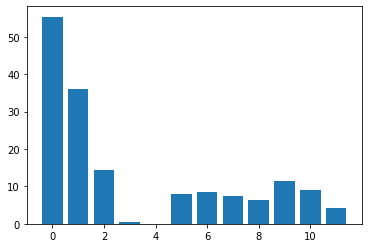

In [931]:
# Feature Selection untuk data kunjungan wisatawan nusantara ke destinasi wisata DKI Jakarta 2020

# Fungsi seleksi fitur
def anova_select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k="all")
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load dataset
X, y = data_kunjungan_wisatawan_nusantara.iloc[:,1:13], data_kunjungan_wisatawan_nusantara.iloc[:, -1]
# Membagi data menjadi train dan test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# Proses feature selection
X_train_fs, X_test_fs, fs = anova_select_features(X_train, y_train, X_test)
# Nilai/scores untuk features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot nilai features
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [932]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 71.43


Feature 0: 5.609697
Feature 1: 3.594560
Feature 2: 4.415278
Feature 3: nan
Feature 4: nan
Feature 5: 3.266108
Feature 6: 2.032120
Feature 7: 2.165029
Feature 8: 3.328990
Feature 9: 3.312536
Feature 10: 5.011606
Feature 11: 1.430235


c:\users\moody asyer\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [3 4] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\users\moody asyer\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


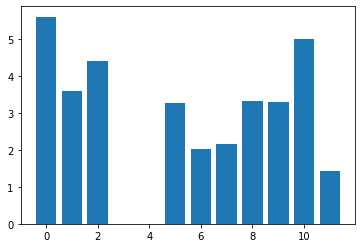

In [933]:
# Feature Selection untuk data kunjungan wisatawan mancanegara ke destinasi wisata DKI Jakarta 2020

# load dataset
X, y = data_kunjungan_wisatawan_mancanegara.iloc[:,1:13], data_kunjungan_wisatawan_mancanegara.iloc[:, -1]
# Membagi data menjadi train dan test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# Proses feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# Nilai/scores untuk features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot nilai features
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [934]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 85.71


Feature 0: 0.670002
Feature 1: 0.422872


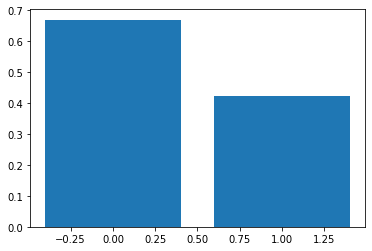

In [935]:
# Feature Selection untuk data kunjungan wisatawan mancanegara ke provinsi DKI Jakarta tahun 2020

# load dataset
X, y = kunjungan_mancanegara_2020.iloc[:,1:3], kunjungan_mancanegara_2020.iloc[:, -1]
# Membagi data menjadi train dan test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# Proses feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# Nilai/scores untuk features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot nilai features
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [936]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 100.00


### - Seleksi fitur Pearson's

Feature 0: 52.928810
Feature 1: 32.052603
Feature 2: 197.691959
Feature 3: 0.386885
Feature 4: nan
Feature 5: 32.730175
Feature 6: 38.500880
Feature 7: 53.752085
Feature 8: 87.067463
Feature 9: 176.063251
Feature 10: 55.049971
Feature 11: 72.144347


c:\users\moody asyer\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


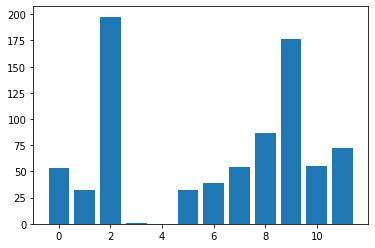

In [937]:
# Feature Selection untuk data kunjungan wisatawan nusantara ke destinasi wisata DKI Jakarta 2020
# Fungsi seleksi fitur
def pearson_select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k="all")
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load dataset
X, y = data_kunjungan_wisatawan_nusantara.iloc[:,1:13], data_kunjungan_wisatawan_nusantara.iloc[:, -2]
# Membagi data menjadi train dan test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# Proses feature selection
X_train_fs, X_test_fs, fs = pearson_select_features(X_train, y_train, X_test)
# Nilai/scores untuk features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot nilai features
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [938]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 0.00


Feature 0: 558.027053
Feature 1: 634.459842
Feature 2: 290.803192
Feature 3: nan
Feature 4: nan
Feature 5: 31.295039
Feature 6: 2.382055
Feature 7: 4.684205
Feature 8: 2.037115
Feature 9: 15.537049
Feature 10: 1.675614
Feature 11: 0.059703


c:\users\moody asyer\appdata\local\programs\python\python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


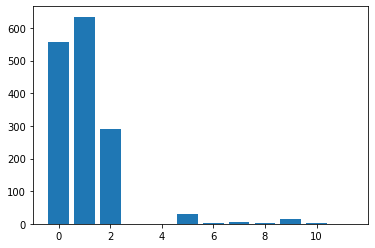

In [939]:
# Feature Selection untuk data kunjungan wisatawan mancanegara ke destinasi wisata DKI Jakarta 2020
# load dataset
X, y = data_kunjungan_wisatawan_mancanegara.iloc[:,1:13], data_kunjungan_wisatawan_mancanegara.iloc[:, -2]
# Membagi data menjadi train dan test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# Proses feature selection
X_train_fs, X_test_fs, fs = pearson_select_features(X_train, y_train, X_test)
# Nilai/scores untuk features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot nilai features
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [940]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 14.29


Feature 0: 39.197176
Feature 1: 40826340.905416


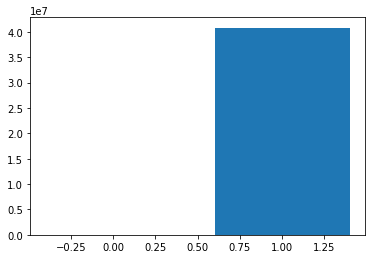

In [941]:
# Feature Selection untuk data kunjungan wisatawan mancanegara ke provinsi DKI Jakarta tahun 2020
# load dataset
X, y = kunjungan_mancanegara_2020.iloc[:,1:3], kunjungan_mancanegara_2020.iloc[:, -2]
# Membagi data menjadi train dan test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# Proses feature selection
X_train_fs, X_test_fs, fs = pearson_select_features(X_train, y_train, X_test)
# Nilai/scores untuk features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot nilai features
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [942]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 0.00


## 4. Analisa dan Kesimpulan

Setelah melakukan pembersihan dan seleksi fitur pada data, kita bisa dengan jelas melihat bahwa:
- pandemi COVID-19 sangat mempengaruhi bidang pariwisata DKI Jakarta. Hal ini bisa dilihat dari penurunan data wisatawan baik mancanegara atau nusantara bahkan pada bulan 4 dan 5 banyak sekali destinasi wisata yang kunjungannya 0, hal ini wajar karena mengingat situasi saat itu sedang kacau-kacaunya sehingga destinasi wisata ditutup untuk sementara waktu. 
- Hal ini juga berlaku sama dengan data bandara dimana jumlah pengunjung ke Jakarta ketika pandemi COVID-19 melanda langsung turun sangat drastis karena sebagian besar penerbangan diberhentikan sementara waktu juga saat itu.
-  Memasuki sekitar bulan 6 dan 7 kita melihat bahwa data kembali meningkat yang menandakan destinasi wisata sudah dikunjungi wisatawan lagi walaupun situasi kasus pandemi masih juga parah(zona merah), wisatawan pun sepertinya sangat dibatasi jumlahnya sehingga yang berkunjung pun masih sangat sedikit.
- Untuk data kunjungan wisatawan mancanegara jauh lebih sedikit dibanding nusantara adalah karena bandara dan kegiatan penerbangan masih ditutup/diberhentikan sementara waktu, sehingga hampir tidak ada wisatawan yang berkunjung ke bandara Jakarta, apalagi mengunjungi destinasi wisata Jakarta.
- Setelah bulan 4 dan 5 Untuk data kunjungan wisatawan mancanegara ke destinasi wisata Jakarta mengalami naik turun tapi angkanya kurang lebih sama karena sedikit sekali, sedangkan untuk data kunjungan wisatawan asing di bandaranya meningkat terus pelan-pelan walau juga sedikit.
- Setelah bulan 4 dan 5 Untuk data kunjungan wisatawan nusantara ke destinasi wisata Jakarta mengalami naik, pada bulan 10 terjadi kelonggaran pembatasan sehingga angka wisata meningkat cukup tinggi, tapi setelah itu pada bulan 11 dan 12 jatuh lagi. Hal ini dikarenakan saat itu banyak orang yang keluar berwisata dan langsung menimbulkan cluster COVID-19, sehingga kasus naik dan pariwisata akan turun.
- Sebagian besar nilai tertinggi ketika melakukan seleksi fitur adalah bulan 1, 2, dan 3 karena bulan-bulan adalah bulan ketika pandemi belum terjadi(ketika maret belum merajalela), sedangkan untuk kunjungan wisatawan mancanegara ke Jakarta nilai tertingginya adalah Soekarno-Hatta, walaupun pada kasus seleksi fitur ANOVA Halim P K lebih tinggi.
